In [80]:
# Import libraries

from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, Angle, SkyCoord
from astropy.time import Time
from astropy.table import Table, unique
from datetime import datetime

In [81]:
# Functions

def check_date(message):
    '''
    Takes an inputted date and confirms that it is a valid future date.
    
    Parameters
    ----------
    message : str
        The message for the prompt, should accept a date in the form YYYY-MM-DD.

    Returns
    -------
    date : str
        The inputted valid date in YYYY-MM-DD format.
    '''
    # Get current date
    current_date = datetime.today()

    # Initially don't have a date
    have_date = False

    # Loop until given a valid date as input
    while have_date == False:
        # Get input and split into different parts
        date = input(message)
        try: 
            start_year = int(date[0:4])
            start_month = int(date[5:7])
            start_day = int(date[8:10])

            # Check if leap year
            if start_year % 4 == 0:
                if start_year % 400 != 0 and start_year % 100 == 0:
                    leap_year = False
                else:
                    leap_year = True
            else:
                leap_year = False

            # Check that the date is valid
            try:
                if (date[4] != '-') or (date[7] != '-') or (start_year < current_date.year) or (start_month > 12) or (start_month < current_date.month and start_year == current_date.year) or (start_day < current_date.day and start_month == current_date.month and start_year == current_date.year) or (start_month == 2 and leap_year == False and start_day > 28) or (start_month == 2 and leap_year == True and start_day > 29) or (start_day > 31) or ((start_month == 4 or start_month == 6 or start_month == 9 or start_month == 11) and start_day > 30) or (start_month <= 0) or (start_day <= 0):
                    print('Please provide a valid date in the future')
                else:
                    have_date = True
            except:
                print('Date not recognised please try again')
        
        except:
            print('Date not recognised please try again')

    return date

def check_time(message):
    '''
    Takes an inputted timestamp and confirms that it is a valid timestamp.
    
    Parameters
    ----------
    message : str
        The message for the prompt, should accept a timestamp in the form HH:MM.

    Returns
    -------
    date : str
        The inputted valid timestamp in the inputted format.
    '''
    # Initially don't have a time
    have_time = False

    # Loop until given a valid time as input
    while have_time == False:
        # Get input and split into different parts
        time = input(message)
        try: 
            start_hour = int(time[0:2])
            start_minute = int(time[3:5])

            # Check that the date is valid
            try:
                if (time[2] != ':') or (start_hour > 23) or (start_minute > 59):
                    print('Please provide a valid time')
                else:
                    have_time = True
            except:
                print('Time not recognised please try again')
        except:
            print('Time not recognised please try again')

    return time

def get_lst(loc, utc, name=None):
    '''
    Gets the LST at a point on the Earth's surface at a given time and prints it if given a name for the location, otherwise it returns the LST.

    Parameters
    ----------
    loc : EarthLocation
        The location in astropy EarthLocation format.
    utc
        The time and date in UTC that the LST is to be found at.
    name : str
        The name of the location that the LST is to be found at, default None.
    
    Returns
    -------
    lst
        The local siderial time at that location and time.
    '''
    time = Time(utc, scale='utc', location=loc)
    lst = time.sidereal_time('mean')
    if name != None: 
        print(f'The local siderial time at {name} at UTC: {utc} is: ' + str(lst))
    else:
        return lst
    
def check_file(message, columns=None):
    '''
    Checks an inputted path to a CSV and attempts to keep the specified columns, if none are specified, all columns are kept.

    Parameters
    ----------
    message : str
        The propmt for the CSV file to be dealt with.
    columns : array likee
        The list of columns to be kept in the CSV, None.
    Returns
    -------
    table
        An astropy table from the CSV.
    '''
    # Initially don't have a valid file
    have_file = False
    
    file = input(message)

    # If the file is valid we can quit, otherwise it tries again
    try:
        table = ascii.read(file)
        if columns != None:
            table.keep_columns(columns)
        have_file = True
    except:
        print('File name not recognised, please try again')
        if columns != None:
            print(f'Please make sure the file has the columns {columns}')
        check_file
    
    return table

def want(objects):
    '''
    See if the user wants to observe a class of objects in the observation window.

    Parameters
    ----------
    objects : str
        The class of objects asked about.
    
    Returns
    -------
    bool
        Whether or not to observe the objects.
    '''
    obs = input(f'Do you want to observe {objects} in this observation? [Y/N]')

    if obs.upper() == 'Y':
        return True
    elif obs.upper() == 'N':
        return False
    else:
        want(objects)

In [82]:
# Set up times and locations

valid_dates = False
valid_times = False

# Check that dates and times are in the right order
while valid_dates == False:
    start_date = check_date('Please enter starting date of observation (YYYY-MM-DD): ')
    end_date = check_date('Please enter ending date of observation (YYYY-MM-DD): ')

    if (int(start_date[0:4]) > int(end_date[0:4])) or (int(start_date[0:4]) == int(end_date[0:4]) and int(start_date[5:7]) > int(end_date[5:7])) or (start_date[0:4] == end_date[0:4] and start_date[5:7] == end_date[5:7] and int(start_date[8:10]) > int(end_date[8:10])):
        print('End date must be the same or later than the start date')
    else:
        valid_dates = True

while valid_times == False:
    start_time = check_time('Please enter starting time of observation (HH:MM): ')
    end_time = check_time('Please enter ending time of observation (HH:MM): ')

    if start_date == end_date:
        if (start_time == end_time) or (int(start_time[0:2]) > int(end_time[0:2])) or (int(start_time[0:2]) == int(end_time[0:2]) and int(start_time[3:5]) > int(end_time[3:5])):
            print('End time must be later than the start time')
        else:
            valid_times = True
    else:
        valid_times = True


starting = start_date + ' ' + start_time
ending = end_date + ' ' + end_time

starting_time = Time(starting, scale='utc')
ending_time = Time(ending, scale='utc')

# Birr
birr_loc = EarthLocation(lat=53.095*u.deg, lon=-7.922*u.deg)

# Onsala
onsala_loc = EarthLocation(lat=57.399*u.deg, lon=11.930*u.deg)


# Midpoint
mid_lon = (birr_loc.lon + onsala_loc.lon) / 2
mid_lat = (birr_loc.lat + onsala_loc.lat) / 2
mid_loc = EarthLocation(lat=mid_lat, lon=mid_lon)
LST_start_mid = get_lst(mid_loc, starting)
LST_end_mid = get_lst(mid_loc, ending)

print('Starting LST at midpoint:', LST_start_mid)
get_lst(birr_loc, starting, 'Birr')
get_lst(onsala_loc, starting, 'Onsala')

print('\n')

print('Ending LST at midpoint:', LST_end_mid)
get_lst(birr_loc, ending, 'Birr')
get_lst(onsala_loc, ending, 'Onsala')

Starting LST at midpoint: 18h50m07.2138479s
The local siderial time at Birr at UTC: 2024-07-02 00:00 is: 18h10m24.97384791s
The local siderial time at Onsala at UTC: 2024-07-02 00:00 is: 19h29m49.4538479s


Ending LST at midpoint: 18h58m00.32628234s
The local siderial time at Birr at UTC: 2024-07-04 00:00 is: 18h18m18.08628234s
The local siderial time at Onsala at UTC: 2024-07-04 00:00 is: 19h37m42.56628233s


In [83]:
# Import data and clean it up

# Check what objects are to be observed
want_exo = want('exoplanets')
want_psr = want('pulsars independently')

# Exoplanet data
if want_exo == True:
    planets = check_file('Path to CSV file containing exoplanet hostname, coordinates and distances in NASA exoplanet database format: ', ['hostname', 'ra', 'dec', 'sy_dist'])

    # One planet per host
    planets = unique(planets, 'hostname')

    # Sort by distance
    planets.sort(keys='sy_dist')

    # The coordinates of the planets
    planets_ra = np.array(planets['ra'])
    planets_dec = np.array(planets['dec'])

    planets_coords = SkyCoord(ra=planets_ra, dec=planets_dec, unit='deg')

# Pulsar data
# Need to at least observe a pulsar once for calibration purposes
pulsars = check_file('Path to CSV file containing pulsar names, coordinates and luminosities in ATNF format: ', ['NAME', 'RAJ', 'DECJ', 'R_LUM'])

# Remove rows without luminosities
ind = pulsars['R_LUM'] != '*'
pulsars = pulsars[ind]

# Convert luminosities to floats
luminosities = np.array([])

for i in range(len(pulsars['R_LUM'])):
    base, exp = pulsars['R_LUM'][i].split('E')
    lum = float(base) * 10**float(exp)
    luminosities = np.append(luminosities, lum)

pulsars['R_LUM'] = luminosities

# The coordinates of the pulsars
psr_ra = np.array(pulsars['RAJ'])
psr_dec = np.array(pulsars['DECJ'])

psr_coords = SkyCoord(ra=psr_ra, dec=psr_dec, unit=(u.hourangle, u.deg))

In [85]:
# Pointing times

pointing_time_psr_cal = check_time('Time to spend observing a calibration pulsar (HH:MM): ')
pointing_time_psr_cal = (int(pointing_time_psr_cal[0:2])*u.hr + int(pointing_time_psr_cal[3:5])*u.min + 1*u.min).to(u.hr).value

if want_exo == True:
    # How long we'll point at a planet
    pointing_time_planet = check_time('Time to spend observing a planet (HH:MM): ')
    pointing_time_planet = (int(pointing_time_planet[0:2])*u.hr + int(pointing_time_planet[3:5])*u.min + 1*u.min).to(u.hr).value

    # Copy of planets that we can delete stuff from
    planets_copy = Table(planets, copy=True)

if want_psr == True:
    # How long we'll point at a planet
    pointing_time_psr = check_time('Time to spend observing a pulsar (HH:MM): ')
    pointing_time_psr = (int(pointing_time_psr[0:2])*u.hr + int(pointing_time_psr[3:5])*u.min + 1*u.min).to(u.hr).value

    # Copy of planets that we can delete stuff from
    pulsars_copy = Table(pulsars, copy=True)

In [88]:
# Optimise for closest to zenith at the middle of the observation window

time_LST = LST_start_mid.value
time_offset = 0
target_list = []
target_type = []

# How long from the start we will observe for
obs_time = (ending_time.mjd - starting_time.mjd) * 24 # hours

################################
# Calibration pulsar initially #
################################
mid_lst = (time_LST + pointing_time_psr_cal/2) * 15
zenith = SkyCoord(ra=mid_lst, dec=mid_lat, unit='deg')

sep = zenith.separation(psr_coords)
ind = np.argmin(sep)
target_list.append(pulsars_copy['NAME'][ind])

# Delete that index from the coordinates array and the copy table to prevent repeats
psr_coords = np.delete(psr_coords, ind)
pulsars_copy.remove_row(ind)

target_type.append('pulsar')

time_offset += pointing_time_psr_cal
time_LST += pointing_time_psr_cal

#########################
# Go for obs_time hours #
#########################
while time_offset <= obs_time:
    # Find the RA that is directly overhead in the middle of the observation window
    mid_lst_planet = (time_LST + pointing_time_planet/2) * 15
    mid_lst_psr = (time_LST + pointing_time_psr/2) * 15

    # Find target that is closest to the zenith at the middle of the observation window
    zenith_planet = SkyCoord(ra=mid_lst_planet, dec=mid_lat, unit='deg')
    zenith_psr = SkyCoord(ra=mid_lst_psr, dec=mid_lat, unit='deg')

    # Exoplanets
    if want_exo == True:
        sep_exo = zenith_planet.separation(planets_coords)
        ind_exo = np.argmin(sep_exo)
        sep_exo = sep_exo[ind_exo]
    else:
        sep_exo = np.inf

    # Pulsars
    if want_psr == True:
        sep_psr = zenith_psr.separation(psr_coords)
        ind_psr = np.argmin(sep_psr)
        sep_psr = sep_psr[ind_psr]
    else:
        sep_psr = np.inf

    # See which is closest to zenith
    if sep_exo < sep_psr:
        target_list.append(planets_copy['hostname'][ind_exo])

        # Delete that index from the coordinates array and the copy table to prevent repeats
        planets_coords = np.delete(planets_coords, ind_exo)
        planets_copy.remove_row(ind_exo)

        target_type.append('planet')
        
        # Move on
        time_offset += pointing_time_planet
        time_LST += pointing_time_planet
    else:
        target_list.append(pulsars_copy['NAME'][ind_psr])

        # Delete that index from the coordinates array and the copy table to prevent repeats
        psr_coords = np.delete(psr_coords, ind_psr)
        pulsars_copy.remove_row(ind_psr)

        target_type.append('pulsar')
        
        # Move on
        time_offset += pointing_time_psr
        time_LST += pointing_time_psr

# Output target list
print(target_list)

['J2210+57', 'HD 235088', 'TOI-1431', 'TOI-1386', 'TOI-1470', 'TOI-3693', 'TOI-3688 A', 'TOI-1696', 'TOI-3757', 'TOI-1694', 'TOI-3785', 'HD 77946', 'TOI-1199', 'TOI-2068', 'TOI-1272', 'TOI-1273', 'TOI-2048', 'TOI-2081', 'WD 1856+534', 'TOI-6008', 'TOI-2285', 'TOI-1759', 'TOI-1467', 'TOI-2120', 'TOI-1736', 'TOI-1685', 'TOI-4137', 'TOI-1728', 'TOI-3807', 'TOI-1260', 'TOI-5704', 'TOI-1268', 'TOI-1798', 'TOI-1411', 'TOI-2260', 'TOI-2180', 'TOI-2010']


Text(0.5, 1.0, 'Optimum observation windows with distance against RA of the exoplanets plotted')

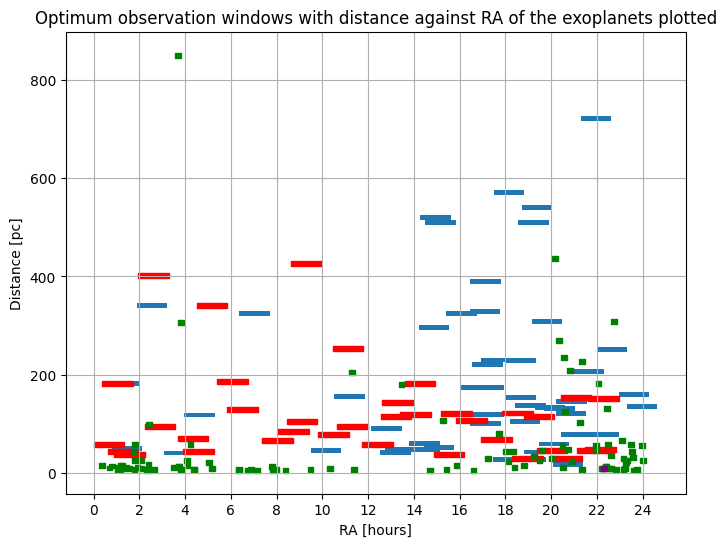

In [126]:
# Plot the optimum viewing windows for the targets
fig, ax = plt.subplots(figsize=(8,6))

# All planets
for i in range(len(planets['ra'])):
    # Plot from optimum start time of observation to +20 degrees (1 hr 20 mins)
    ax.broken_barh([(planets['ra'][i] - 10, 20)], (planets['sy_dist'][i], 10))

# Targeted planets in a different colour
for i in range(1, len(target_list)):
    index = planets['hostname'] == target_list[i]
    if sum(index) != 0:
        ind = np.argwhere(index)[0][0]

        # Plot from optimum start time of observation to +20 degrees (1 hr 20 mins)
        ax.broken_barh([(planets['ra'][ind] - 10, 20)], (planets['sy_dist'][ind], 10), color='red')
        #ax.text(planets['ra'][ind]+0.5 - 10, planets['sy_dist'][ind], planets['hostname'][ind])

# All pulsars
for i in range(len(pulsars['NAME'])):
    # Plot from optimum start time of observation to +3.75 degrees (15 mins)
    ax.broken_barh([(Angle(psr_ra[i], u.hourangle).value * 15, 3.75)], (pulsars['R_LUM'][i]/5, 10), color='green')

# Targeted pulsar in a different colour
index = pulsars['NAME'] == target_list[0]
ind = np.argwhere(index)[0][0]

# Plot from optimum start time of observation to +3.75 degrees (15 mins)
ax.broken_barh([(Angle(psr_ra[ind], u.hourangle).value * 15, 3.75)], (pulsars['R_LUM'][ind]/5, 10), color='purple')
        

ax.set_xticks(np.arange(0, 361, 30))
ax.set_xticklabels(np.arange(0, 25, 2))
ax.grid(True)
ax.set_xlabel('RA [hours]')
ax.set_ylabel('Distance [pc]')
ax.set_title('Optimum observation windows with distance against RA of the exoplanets plotted')


Text(0.5, 1.0, 'Scheduled time, RA against Distance of stars, red dots - when the star reaches its zenith')

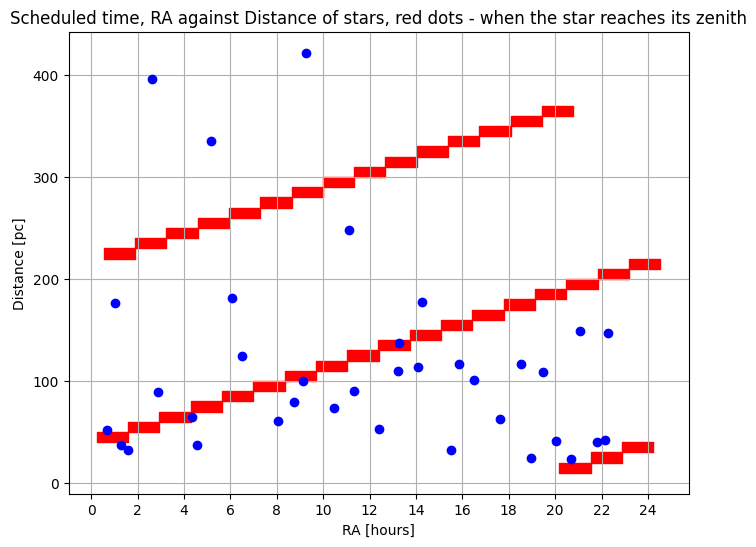

In [131]:
# Plot Actual viewing times
fig, ax = plt.subplots(figsize=(8,6))
ax.grid(True)

start_deg = LST_start_mid.value * 360/24


for i in range(1, len(target_list)):
    # Plot from start time of observation to +20 degrees (1 hr 20 mins)
    index = planets['hostname'] == target_list[i]
    ind = np.argwhere(index)[0][0]

    # Plot at [len of planet observation * no planets already observed in hours + the initial offset as not starting from 0]
    ax.broken_barh([((pointing_time_planet * i * 15 + start_deg) % 360, (pointing_time_planet * 15) % 360)], (i*10, 10), color='red')
    #ax.text(pointing_time_planet * i * 15 + start_deg, planets['sy_dist'][ind], planets['hostname'][ind])
    ax.plot(planets['ra'][ind], planets['sy_dist'][ind], 'bo')

ax.set_xticks(np.arange(0, 361, 30))
ax.set_xticklabels(np.arange(0, 25, 2))
ax.set_xlabel('RA [hours]')
ax.set_ylabel('Distance [pc]')
ax.set_title('Scheduled time, RA against Distance of stars, red dots - when the star reaches its zenith')



In [ ]:
# Output schedule with pointings and timings in iLiSA format

sched_iLiSA = Table(names=('Name', 'Time', 'RA', 'DEC'), dtype=(str, str, float, float))

time = starting_time.mjd

for i in range(len(target_list)):
    index = planets['hostname'] == target_list[i]
    ind = np.argwhere(index)[0][0]

    sched_iLiSA.add_row((planets['hostname'][ind], Time(time, format='mjd').iso[11:16], planets['ra'][ind]*u.deg.to(u.rad), planets['dec'][ind]*u.deg.to(u.rad)))

    # Wait the 1 hr 21 minutes
    time += pointing_time_planet/24     

# Take same frequency range for all observations

have_freq_range = False

while have_freq_range == False:

    try:
        min_freq = float(input('Please give the minimum frequency you\'d like to observe at (in MHz): '))
        max_freq = float(input('Please give the maximum frequency you\'d like to observe at (in MHz): '))
        have_freq_range = True
    except:
        print('Please enter a valid frequency')

freq_range = str(min_freq) + 'e6:' + str(max_freq) + 'e6'

sched_iLiSA['freqrng'] = freq_range

# Get the duration

dur = str(int(np.round((pointing_time_planet - 1/60) * 60))) + 'm'

sched_iLiSA['dur'] = dur

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Output schedule with pointings and timings in I-LOFAR format

sched_realta = Table(names=('start', '-', 'stop', ':', 'name', 'coords'), dtype=(str, str, str, str, str, str))

time = starting_time.mjd

for i in range(len(target_list)):
    index = planets['hostname'] == target_list[i]
    ind = np.argwhere(index)[0][0]

    end_time = time + (pointing_time_planet - 1/60)/24
    # Make sure the end tiem doesn't overshoot
    if end_time > ending_time.mjd:
        end_time = ending_time.mjd

    sched_realta.add_row((Time(time, format='mjd').iso, '-', Time(end_time, format='mjd').iso, ':', planets['hostname'][ind], f'[{planets['ra'][ind]*u.deg.to(u.rad)}, {planets['dec'][ind]*u.deg.to(u.rad)}, \'J2000\']'))

    # Wait the 1 hr 21 minutes
    time += pointing_time_planet/24     


In [ ]:
# Output files

ascii.write(sched_iLiSA, 'sched_iLiSA_temp.txt', overwrite=True)
ascii.write(sched_realta, 'sched_realta_temp.txt', overwrite=True)

# Need to remove the quotation marks
iLiSA = open('sched_iLiSA_temp.txt', 'r')
iLiSA_out = open('sched_iLiSA_out.txt', 'w')

rmv_quotes = iLiSA.read()
rmv_quotes = rmv_quotes.replace('"', '')

iLiSA_out.write(rmv_quotes)

realta = open('sched_realta_temp.txt', 'r')
realta_out = open('sched_realta_out.txt', 'w')

rmv_quotes = realta.read()
rmv_quotes = rmv_quotes.replace('"', '')

realta_out.write(rmv_quotes)

# Close the files
iLiSA.close()
iLiSA_out.close()

realta.close()
realta_out.close()